<br>
<center>

# Assignments for Week 5

</center>

<div style="text-align: right; width: 15%; margin-left: auto;">
    
Jon Cannaday <br>
DSC 550 <br>
4/11/2024  

</div>


## Libraries

In [25]:
import pandas as pd
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

## Part 1: Get the stemmed data using the same process you did in Week 3.
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

   - ### Import the movie review data as a data frame and ensure that the data is loaded properly.


In [2]:
path = r'C:\Users\Owner\OneDrive\Desktop\DataScience\2024_Spring_DataMining\labeledTrainData.tsv'
data = pd.read_csv(path, sep='\t')


print(type(data)) # Data type
print()
print(data.head()) # Data check

<class 'pandas.core.frame.DataFrame'>

       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...


   - ### How many of each positive and negative reviews are there?


In [3]:
positive = data[data['sentiment'] == 1] # Boolean filter where condition it true
negative = data[data['sentiment'] == 0]

print("Positive reviews: ", len(positive)) # Number of elements
print("Negative reviews: ", len(negative))

Positive reviews:  12500
Negative reviews:  12500


   - ### Use TextBlob to classify each movie review as positive or negative. Assume that a polarity score greater than or equal to zero is a positive sentiment and less than 0 is a negative sentiment.


In [4]:
# Create prediction column using Polarity which quantifies the sentiment returns binary 
data['predicted_sentiment'] = data['review'].apply(lambda text: 1 if TextBlob(text).sentiment.polarity >= 0 else 0)

print()
print(data['predicted_sentiment'])


0        1
1        1
2        0
3        1
4        0
        ..
24995    1
24996    1
24997    1
24998    1
24999    1
Name: predicted_sentiment, Length: 25000, dtype: int64


   - ### Check the accuracy of this model. Is this model better than random guessing?


In [5]:
accuracy_textblob = accuracy_score(data['sentiment'], data['predicted_sentiment']) # Accuracy statment
print()
print("Model accuracy : ", accuracy_textblob) # Results
print()
print("Which would be better than guessing, we have a 50/50 shot at guessing correctly.")


Model accuracy :  0.68524

Which would be better than guessing, we have a 50/50 shot at guessing correctly.


   - ### Convert all text to lowercase letters.


In [6]:
data['review'] = data['review'].str.lower() # Lower case
print()
print(data['review'].head())


0    with all this stuff going down at the moment w...
1    \the classic war of the worlds\" by timothy hi...
2    the film starts with a manager (nicholas bell)...
3    it must be assumed that those who praised this...
4    superbly trashy and wondrously unpretentious 8...
Name: review, dtype: object


   - ### Remove punctuation and special characters from the text.


In [7]:
# not in logic to remove the punctuation
data['review'] = data['review'].apply(lambda text: ''.join(char for char in text if char not in string.punctuation))
print()
print(data['review'].head())


0    with all this stuff going down at the moment w...
1    the classic war of the worlds by timothy hines...
2    the film starts with a manager nicholas bell g...
3    it must be assumed that those who praised this...
4    superbly trashy and wondrously unpretentious 8...
Name: review, dtype: object


   - ### Remove stop words.


In [8]:
# not in logic to remove the stop words
stop_words = set(stopwords.words('english'))
data['review'] = data['review'].apply(lambda text: ' '.join(word for word in text.split() if word not in stop_words))

print()
print(data['review'].head())


0    stuff going moment mj ive started listening mu...
1    classic war worlds timothy hines entertaining ...
2    film starts manager nicholas bell giving welco...
3    must assumed praised film greatest filmed oper...
4    superbly trashy wondrously unpretentious 80s e...
Name: review, dtype: object


   - ### Apply NLTK’s PorterStemmer.


In [9]:
# Initiates PorterStemmer
stemmer = PorterStemmer()

# create a review column and split 
data['review'] = data['review'].apply(lambda text: ' '.join(stemmer.stem(word) for word in text.split()))

print()
print(data['review'].head())


0    stuff go moment mj ive start listen music watc...
1    classic war world timothi hine entertain film ...
2    film start manag nichola bell give welcom inve...
3    must assum prais film greatest film opera ever...
4    superbl trashi wondrous unpretenti 80 exploit ...
Name: review, dtype: object


   - ### Create a bag-of-words matrix from your stemmed text (output from (4)), where each row is a word-count vector for a single movie review (see sections 5.3 & 6.8 in the Machine Learning with Python Cookbook). Display the dimensions of your bag-of-words matrix. The number of rows in this matrix should be the same as the number of rows in your original data frame.


In [10]:
# initiates port stemmer
stemmer = PorterStemmer()

# Custom column 
data['review'] = data['review'].apply(lambda text: ' '.join(stemmer.stem(word) for word in text.split()))

# Matrix
vectorizer = CountVectorizer()
bag_of_words_matrix = vectorizer.fit_transform(data['review'])

# Matrix dimensions
print("Dimensions of the bag-of-words matrix:", bag_of_words_matrix.shape)

Dimensions of the bag-of-words matrix: (25000, 91587)


   - ### Create a term frequency-inverse document frequency (tf-idf) matrix from your stemmed text, for your movie reviews (see section 6.9 in the Machine Learning with Python Cookbook). Display the dimensions of your tf-idf matrix. These dimensions should be the same as your bag-of-words matrix.

In [11]:
stemmer = PorterStemmer()

# Custom colum that passes each split work idto the stemmer
data['review'] = data['review'].apply(lambda text: ' '.join(stemmer.stem(word) for word in text.split()))

# tf-idf matrix
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['review'])

# tf-idf Matrix dimensions
print("Dimensions of the tf-idf matrix:", tfidf_matrix.shape)

Dimensions of the tf-idf matrix: (25000, 91473)


## Part 2: Split this into a training and test set.
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

In [42]:
# Set each review and sentiment column as variables

X = data['review']  # Features
y = data['sentiment']  # Target

# Split the columns into 80-20
# 80 being where the model gathers its statistics
# 20 where the statistcs are used on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (20000,) (20000,)
Test set shape: (5000,) (5000,)


## Part 3: Fit and apply the tf-idf vectorization to the training set.
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

In [43]:
# Term Frequency-Inverse Document Frequency which is a class 
tfidf_vectorizer = TfidfVectorizer()

# Weights for each word in the training set
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform method instead of fit_transform because we already have the data needed
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Training set Dimensions : ", X_train_tfidf.shape)
print("Test set Dimensions :", X_test_tfidf.shape)

Training set Dimensions :  (20000, 80029)
Test set Dimensions : (5000, 80029)


## Part 4: Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

When we vectorized the training data it simply ran a model using the data in the 80 training set. We do not want the model to use the new data to get new statistics & vocab, we want the model to apply what it gathered from the training data and apply it to new data. 

## Part 5: Train a logistic regression using the training data.
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

In [44]:
# Binary model
logistic_regression_model = LogisticRegression()

# will see the weights of each word and determine the relationship
logistic_regression_model.fit(X_train_tfidf, y_train)

LogisticRegression()

## Part 6: Find the model accuracy on test set.
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

In [45]:
# Test on Y
y_pred = logistic_regression_model.predict(X_test_tfidf)

# Accuracy
accuracy_test = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_test)

Accuracy: 0.8866


## Part 7: Create a confusion matrix for the test set predictions.
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

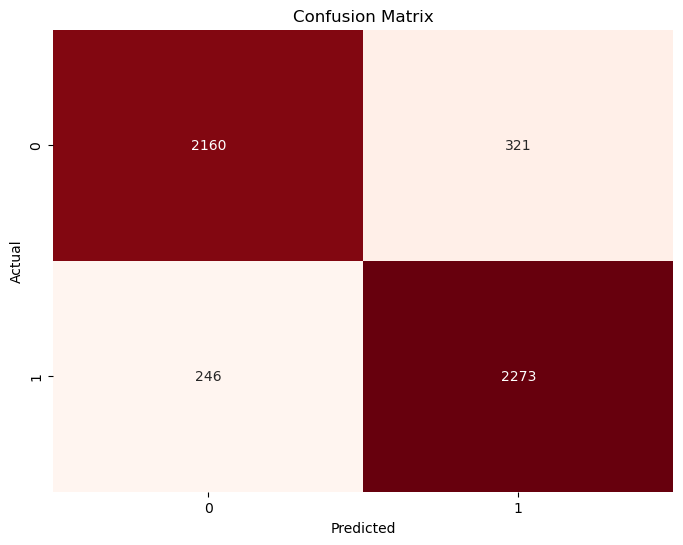

In [46]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Part 8: Get the precision, recall, and F1-score for the test set predictions.
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1-score = 2 * (Precision * Recall) / (Precision + Recall)

In [47]:
# Precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Precision: 0.8762528912875868
Recall: 0.9023421992854307
F1-score: 0.889106199882652


## Part 9: Create a ROC curve for the test set.
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

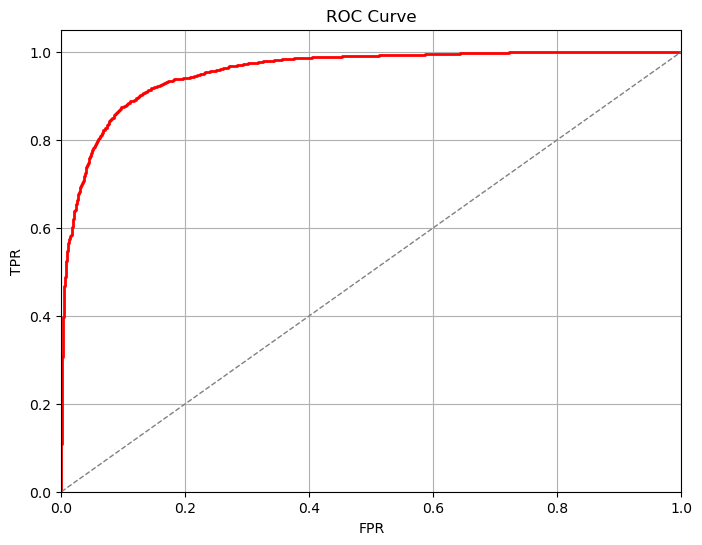

In [54]:
# Positive class
y_prob = logistic_regression_model.predict_proba(X_test_tfidf)[:, 1]

# False positive rate, true positive rate, and thresholds
# Receiver Operating Characteristic
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Area under the ROC curve
auc = roc_auc_score(y_test, y_prob)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

## Part 10: Pick another classification model you learned about this week and repeat steps (5) – (9).
<br>
<div style="width: 100%; border-bottom: 1px solid black;"></div>

In [49]:
# classification model
random_forest_model = RandomForestClassifier()

# enter training data into the class
random_forest_model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [50]:
# Array of predicted class labels.
y_pred_rf = random_forest_model.predict(X_test_tfidf)

# Compares the true labels with the predicted labels 
accuracy_test_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy :", accuracy_test_rf)

Accuracy : 0.8482


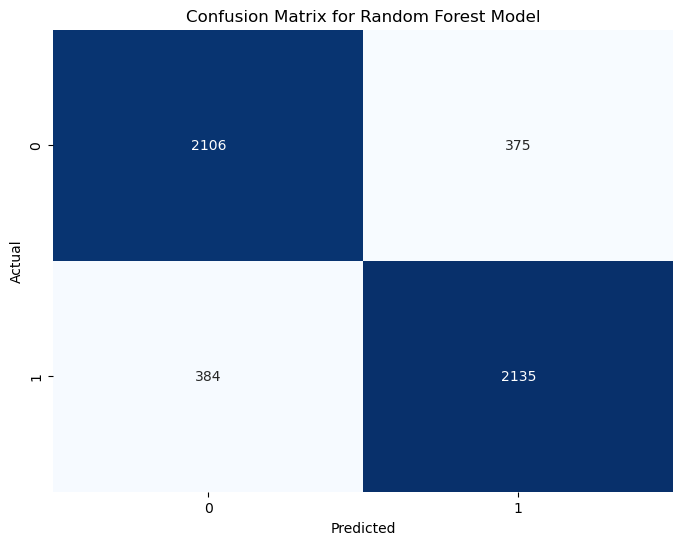

In [51]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
# Precision, recall, and F1-score
precision_rf, recall_rf, f1_score_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='binary')

print("Precision :", precision_rf)
print("Recall :", recall_rf)
print("F1-score :", f1_score_rf)

Precision : 0.850597609561753
Recall : 0.8475585549821357
F1-score : 0.8490753628952078


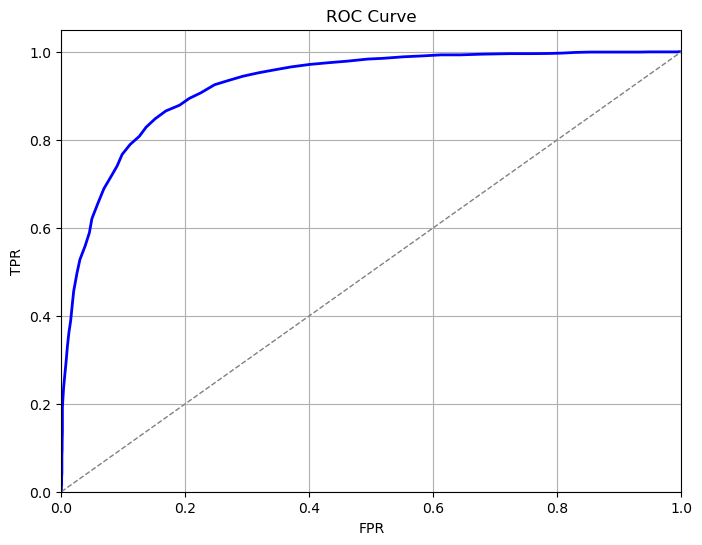

In [53]:
# predicted probabilities of the positive class
y_prob_rf = random_forest_model.predict_proba(X_test_tfidf)[:, 1]

# Rates
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

# Area under curve
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid(True)
plt.show()